In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/ta_20220921111815.csv', header=7)

In [3]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-01-01,159,3.9,1.1,7.0
1,1907-01-02,159,0.7,-2.2,3.8
2,1907-01-03,159,1.8,-0.2,7.0
3,1907-01-04,159,3.4,-1.0,8.3
4,1907-01-05,159,9.3,0.8,12.8


In [4]:
df.isnull().sum()

날짜         0
지점         0
평균기온(℃)    0
최저기온(℃)    2
최고기온(℃)    2
dtype: int64

In [5]:
df.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [6]:
df.rename(columns={df.columns[2]: '평균기온', df.columns[3]: '최저기온', df.columns[4]:'최고기온'}, inplace=True)

In [7]:
df.columns

Index(['날짜', '지점', '평균기온', '최저기온', '최고기온'], dtype='object')

In [8]:
df['최저기온'] = df['최저기온'].fillna(999)
df['최고기온'] = df['최고기온'].fillna(-999)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42267 entries, 0 to 42266
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      42267 non-null  object 
 1   지점      42267 non-null  int64  
 2   평균기온    42267 non-null  float64
 3   최저기온    42267 non-null  float64
 4   최고기온    42267 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [10]:
df.sort_values(by=['최고기온'], ascending=False)

,날짜,지점,평균기온,최저기온,최고기온
40038,2016-08-14,159,31.7,28.3,37.3
27974,1983-08-04,159,30.8,26.5,36.7
40039,2016-08-15,159,29.4,25.3,36.6
40759,2018-08-05,159,31.3,28.1,36.4
40395,2017-08-06,159,31.7,27.6,36.2
...,...,...,...,...,...
2935,1915-01-14,159,-8.9,-12.7,-5.8
9522,1933-01-26,159,-8.5,-9.7,-6.2
2934,1915-01-13,159,-11.3,-14.0,-8.2
24395,1973-10-16,159,15.9,999.0,-999.0


부산에서 가장 더웠던 날은?

In [11]:
max(df['최고기온'])

37.3

In [12]:
df[df['최고기온']==max(df['최고기온'])]

,날짜,지점,평균기온,최저기온,최고기온
40038,2016-08-14,159,31.7,28.3,37.3


In [54]:
# max_t = df.loc[df['최고기온']==max(df['최고기온']),'최고기온']
# max_t_date = df.loc[df.index(df['최고기온']==max(df['최고기온'])),'날짜']
# max_t_date
# print(f'부산에서 가장 더운 날은 {max_t_date} : {max_t}')

TypeError: 'RangeIndex' object is not callable

In [51]:
max_t = df.loc[40038,'최고기온']
max_t_date = df.loc[40038,'날짜']

print(f'부산에서 가장 더운 날은 {max_t_date} : {max_t}')

부산에서 가장 더운 날은 2016-08-14 00:00:00 : 37.3


매년 크리스마스의 최고 기온과 최저 기온의 추이

In [14]:
x_mas_df = df[df['날짜'].str.contains('12-25')]
x_mas_df

,날짜,지점,평균기온,최저기온,최고기온
358,1907-12-25,159,9.1,5.3,13.9
724,1908-12-25,159,3.8,-0.6,9.1
1089,1909-12-25,159,-3.9,-6.6,-0.6
1454,1910-12-25,159,2.7,-0.7,6.0
1819,1911-12-25,159,4.9,3.0,7.7
...,...,...,...,...,...
40536,2017-12-25,159,3.4,0.1,7.5
40901,2018-12-25,159,5.0,0.2,9.9
41266,2019-12-25,159,10.7,5.4,16.3
41632,2020-12-25,159,3.5,0.2,7.6


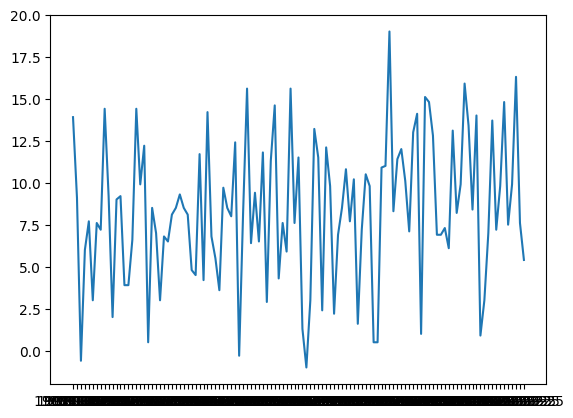

In [21]:
plt.plot(x_mas_df['날짜'], x_mas_df['최고기온'])
plt.show()

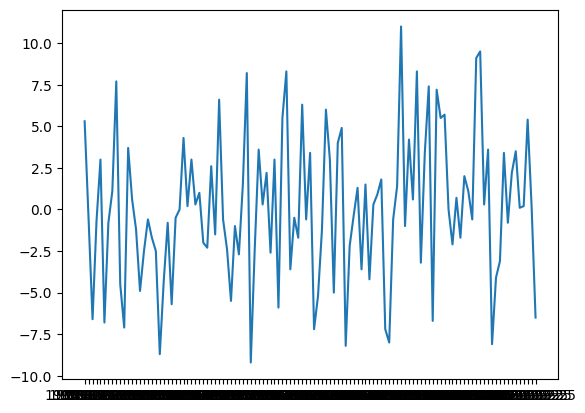

In [23]:
plt.plot(x_mas_df['날짜'], x_mas_df['최저기온'])
plt.show()

내 생일 기준 매년 평균기온 추이?

In [26]:
birth_df = df[df['날짜'].str.contains('05-27')]
birth_df

,날짜,지점,평균기온,최저기온,최고기온
146,1907-05-27,159,17.3,12.5,25.2
512,1908-05-27,159,18.4,13.9,21.2
877,1909-05-27,159,16.0,12.5,20.6
1242,1910-05-27,159,19.5,16.3,26.7
1607,1911-05-27,159,18.6,13.1,23.7
...,...,...,...,...,...
40689,2018-05-27,159,20.2,16.1,24.9
41054,2019-05-27,159,19.3,18.4,20.9
41420,2020-05-27,159,19.4,16.4,26.0
41785,2021-05-27,159,16.9,13.4,20.9


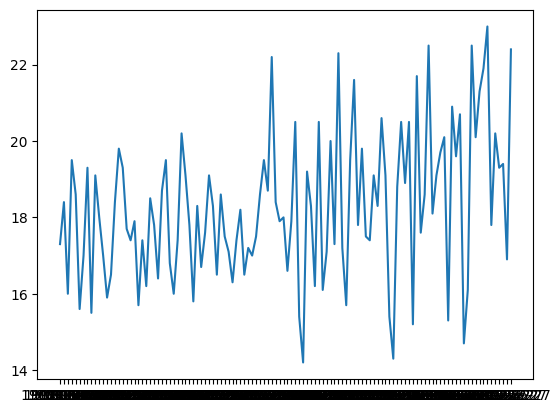

In [27]:
plt.plot(birth_df['날짜'], birth_df['평균기온'])


In [32]:
df['날짜'] = df['날짜'].astype('datetime64')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42267 entries, 0 to 42266
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      42267 non-null  datetime64[ns]
 1   지점      42267 non-null  int64         
 2   평균기온    42267 non-null  float64       
 3   최저기온    42267 non-null  float64       
 4   최고기온    42267 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.6 MB


In [36]:
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day
df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
0,1907-01-01,159,3.9,1.1,7.0,1907,1,1
1,1907-01-02,159,0.7,-2.2,3.8,1907,1,2
2,1907-01-03,159,1.8,-0.2,7.0,1907,1,3
3,1907-01-04,159,3.4,-1.0,8.3,1907,1,4
4,1907-01-05,159,9.3,0.8,12.8,1907,1,5


In [37]:
birth_df = df[(df['월']==5) & (df['일'] == 27)]

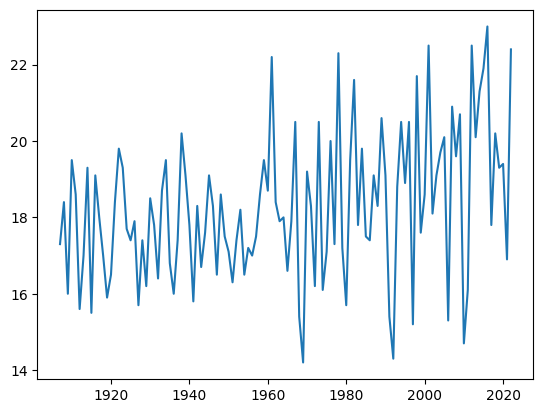

In [40]:
plt.plot(birth_df['년'], birth_df['평균기온'])

매 월 평균 기온 추이

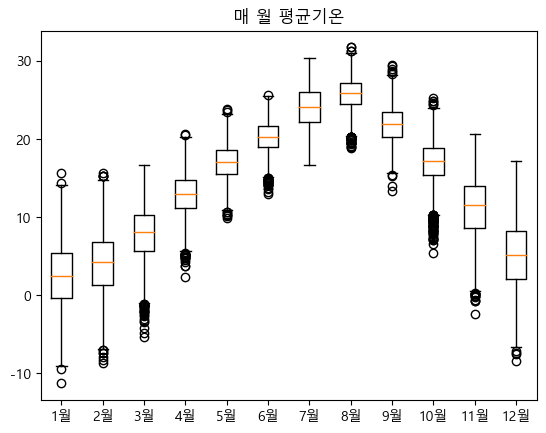

In [61]:
result = []
m_list = []
for n in range(1,13):   
    result.append(df[df['월'] == n]['평균기온'])
    m_list.append(f'{n}월')
plt.rc('font',family='Malgun Gothic')      
plt.rcParams['axes.unicode_minus']=False 
plt.title('매 월 평균기온')
plt.boxplot(result)
plt.xticks(range(1,13), m_list)
plt.show()
